# **Introduzione al Machine Learning -- laboratorio 11 e 12**


* Stimatori di massima verosimiglianza con uno o due parametri
* Regressione lineare semplice


1. Genero un campione con distribuzione di Poisson di parametro a mia scelta
2. Cerco di stimare il parametro con il metodo della massima likelihood

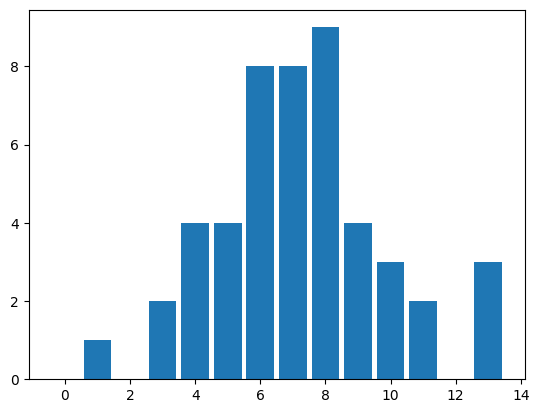

In [20]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np


n = 50
nu = 7.5

data = poisson.rvs(mu=nu, size=n)
plt.hist(data, bins=range(15), align='left', rwidth=0.85)
plt.show()

In [18]:
def l(nu):
  return poisson.logpmf(data, mu=nu).mean()

l(5)

-3.1901418791529284

In [23]:
l(np.linspace(0.1, 15))

-5.081714232062197

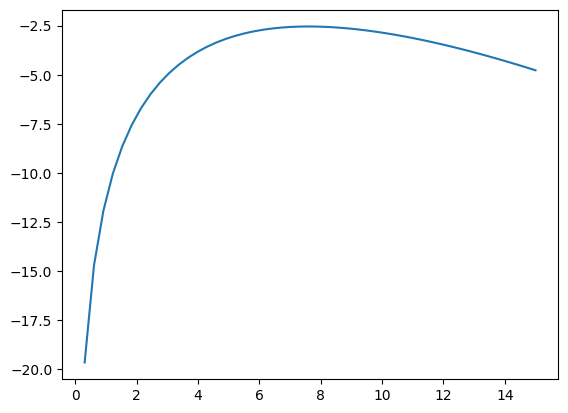

In [26]:
nu_range = np.linspace(0, 15)
li_range = [l(nu) for nu in nu_range]

plt.plot(nu_range, li_range)
plt.show()

In [32]:
print(max(li_range))
print(f'Estimated nu inside 50-points linspace: {nu_range[np.argmax(li_range)]:g}')

-2.5430148278043787
Estimated nu inside 50-points linspace: 7.65306


Come trovare il massimo con `scipy.optimize`

In [34]:
from scipy.optimize import minimize_scalar

loss = lambda nu: -l(nu)

loss(5)

3.12502900054978

In [38]:
opt = minimize_scalar(loss, bracket=(0.1, 10))
opt

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.5428304556275725
       x: 7.599999904270591
     nit: 10
    nfev: 13

In [39]:
dir(opt)

['fun', 'message', 'nfev', 'nit', 'success', 'x']

In [43]:
nu_mle = opt['x']
print(f'ML estimator nu: {nu_mle:g}')

ML estimator nu: 7.6


Nel caso di Poisson lo stimatore ML di di nu è la media campionaria

In [45]:
data.mean()

7.6

1. Genero un campione con distribuzione Gamma di parametri a mia scelta
2. Cerco di stimare i parametri
 con il metodo della massima likelihood

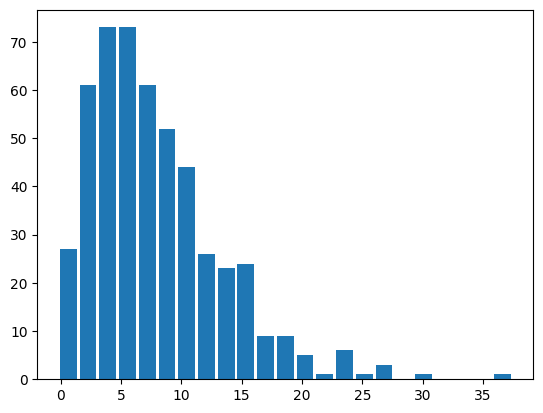

In [62]:
from scipy.stats import gamma

n = 500
alpha = 2.5
beta = 3.5

data_gamma = gamma.rvs(a=alpha, scale=beta, size=n)
plt.hist(data_gamma, bins='auto', align='left', rwidth=0.85)
plt.show()

Scrivo la log-likelihood 'opposta', ovvero la loss

In [70]:
def loss(params):
  alpha, beta = params
  return -gamma.logpdf(data_gamma, a=alpha, scale=beta).mean()

loss(np.array([3, 4]))

3.097828807466825

In [72]:
from scipy.optimize import minimize

minimize(loss, [1, 1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.957301853150342
        x: [ 2.675e+00  3.264e+00]
      nit: 16
      jac: [ 5.245e-06  3.457e-06]
 hess_inv: [[ 1.255e+01 -1.553e+01]
            [-1.553e+01  2.284e+01]]
     nfev: 54
     njev: 18

HW: Fare il grafico 3d o a curve di livello di loss nell'intorno del minimo trovato, per verificare che sia un minimo

HW: Controllare che l'Hessiano sia definito positivo

HW: Effettuare una simulazione MC rifacendo la generazione del campione e la stima ML, N=1000 volte e studiare la distribuzione degli stimatori: sono corretti?

HW: Rifare con Gamma-Poisson


In [74]:
import pandas as pd

df = pd.read_excel('body.xlsx', index_col=0)
df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


In [88]:
male_df = df[df['Gender (1 - male, 0 - female)'] == 1].drop(columns=['Gender (1 - male, 0 - female)'])

male_df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Thigh girth below gluteal fold, average of right and left","Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm)
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,51.5,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,51.5,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,57.3,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,53.0,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,55.4,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,41.7,27.3,31.5,21.8,29.7,14.9,11.8,18.9,13.6,118.2,...,50.9,34.0,28.4,35.0,34.3,21.1,16.3,51,79.1,179.1
244,43.8,32.2,38.0,25.4,32.0,16.0,10.7,21.0,16.8,126.3,...,62.3,34.8,27.5,41.7,37.0,24.3,16.7,30,98.2,190.5
245,41.9,28.0,33.1,26.4,29.9,15.6,11.5,21.2,15.9,121.0,...,63.3,38.6,32.0,38.4,39.8,25.4,18.1,24,84.1,177.8


In [124]:
x = np.sort(male_df.corr().to_numpy().flatten())
max_corr = np.max(x[x < 1])
print(max_corr)

loc = male_df.corr().where(male_df.corr() == max_corr).dropna(how='all', axis=0).dropna(how='all', axis=1)

0.8820464089695219


In [125]:
loc.index.to_list()

['Waist girth, narrowest part of torso below the rib cage,',
 'Navel (or "Abdominal") girth at umbilicus and iliac crest,']

In [127]:
loc.columns.to_list()

['Waist girth, narrowest part of torso below the rib cage,',
 'Navel (or "Abdominal") girth at umbilicus and iliac crest,']

<Axes: xlabel='Waist girth, narrowest part of torso below the rib cage,', ylabel='Navel (or "Abdominal") girth at umbilicus and iliac crest,'>

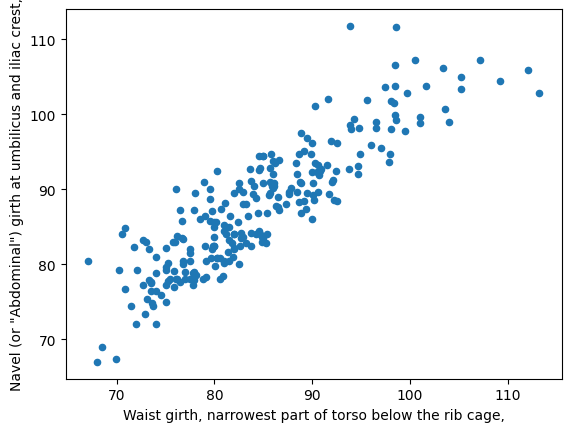

In [133]:
regr_df = male_df[loc.index.to_list()]
regr_df.plot.scatter('Waist girth, narrowest part of torso below the rib cage,',
 'Navel (or "Abdominal") girth at umbilicus and iliac crest,')

In [137]:
from sklearn.linear_model import LinearRegression

X = regr_df['Waist girth, narrowest part of torso below the rib cage,'].to_numpy().reshape(-1,1)
Y = regr_df['Navel (or "Abdominal") girth at umbilicus and iliac crest,'].to_numpy()

rm = LinearRegression().fit(X, Y)

In [138]:
dir(rm)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [140]:
rm.coef_

array([0.84213717])

In [141]:
rm.intercept_

16.473799835374265

In [150]:
X_mat = np.concatenate((np.ones(X.shape), X), axis=-1)
X_mat

array([[  1. ,  71.5],
       [  1. ,  79. ],
       [  1. ,  83.2],
       [  1. ,  77.8],
       [  1. ,  80. ],
       [  1. ,  82.5],
       [  1. ,  82. ],
       [  1. ,  76.8],
       [  1. ,  68.5],
       [  1. ,  77.5],
       [  1. ,  81.9],
       [  1. ,  82.6],
       [  1. ,  85. ],
       [  1. ,  85.6],
       [  1. ,  78. ],
       [  1. ,  82. ],
       [  1. ,  88.3],
       [  1. ,  73.6],
       [  1. ,  78.5],
       [  1. ,  87.3],
       [  1. ,  92. ],
       [  1. ,  80. ],
       [  1. ,  74.5],
       [  1. ,  90.6],
       [  1. ,  81.4],
       [  1. ,  89.5],
       [  1. ,  85. ],
       [  1. ,  73.5],
       [  1. ,  75.8],
       [  1. ,  74. ],
       [  1. ,  77.5],
       [  1. ,  74. ],
       [  1. ,  74. ],
       [  1. ,  82. ],
       [  1. ,  73. ],
       [  1. ,  70.5],
       [  1. ,  75. ],
       [  1. ,  72.1],
       [  1. ,  78.8],
       [  1. ,  77.5],
       [  1. ,  91.5],
       [  1. ,  84.9],
       [  1. ,  79.1],
       [  1

In [151]:
np.matmul(X_mat.T, X_mat)

array([[2.47000000e+02, 2.08797000e+04],
       [2.08797000e+04, 1.78400125e+06]])

In [153]:
np.linalg.inv(np.matmul(X_mat.T, X_mat))

array([[ 3.80673287e-01, -4.45534668e-03],
       [-4.45534668e-03,  5.27052893e-05]])

In [154]:
np.matmul(np.linalg.inv(np.matmul(X_mat.T, X_mat)), np.matmul(X_mat.T, Y))

array([16.47379984,  0.84213717])

HW: verificare anche implementando le formule inizio ora 16 teoria per B0 e B1.

HW: Aggiungere la retta di regressione allo scatter plot.

HW: Calcolare i residui, SSR, Se.